# Set-up

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2
raw_img = cv2.imread('DropletPNGS/30_30_1.png')
def imshow(img):
    cv2.imshow('edges', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [ ]:
gray_img = cv2.cvtColor(raw_img, cv2.COLOR_BGR2GRAY)
# edges = cv2.Canny(gray_img, 50, 110)
gray = cv2.medianBlur(gray_img, 5) 
 
rows = gray.shape[0]

circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, rows / 8, param1=100, param2=30, minRadius=1, maxRadius=30)
# imshow(edges)
# imshow(circles)
# print(circles)
for circle in circles[0, :]:
    print(circle[0])
    cv2.circle(raw_img, (round(circle[0]), round(circle[1])), round(circle[2]), (0, 255, 0))

imshow(raw_img)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

gray = cv2.cvtColor(raw_img, cv2.COLOR_BGR2GRAY)
rows = gray.shape[0]

# Parameters to try
dp_values = [1, 1.5, 2]
min_dist_values = [rows/8, rows/6, rows/4]
param1_values = [50, 100, 150]
param2_values = [20, 30, 40]
min_radius_values = [1, 5, 10]
max_radius_values = [20, 30, 40]

# Function to detect and draw circles
def detect_and_draw_circles(image, params):
    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, *params)
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for circle in circles[0, :]:
            cv2.circle(image, (circle[0], circle[1]), circle[2], (0, 255, 0), 2)
    return image

# Iterate through parameter combinations
for dp in dp_values:
    for min_dist in min_dist_values:
        for param1 in param1_values:
            for param2 in param2_values:
                for min_radius in min_radius_values:
                    for max_radius in max_radius_values:
                        params = (dp, min_dist, param1, param2, min_radius, max_radius)
                        result = detect_and_draw_circles(raw_img.copy(), params)
                        
                        plt.figure(figsize=(10, 10))
                        plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
                        plt.title(f"dp={dp}, min_dist={min_dist}, param1={param1}, "
                                  f"param2={param2}, minRadius={min_radius}, maxRadius={max_radius}")
                        plt.axis('off')
                        plt.show()

In [15]:
from matplotlib import pyplot as plt
import os
import cv2

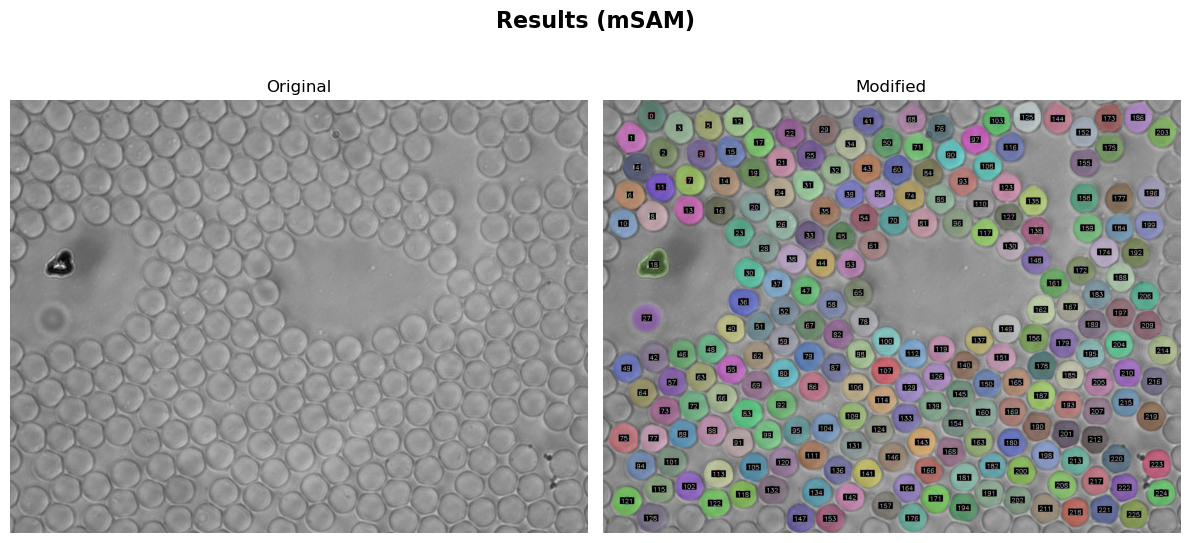

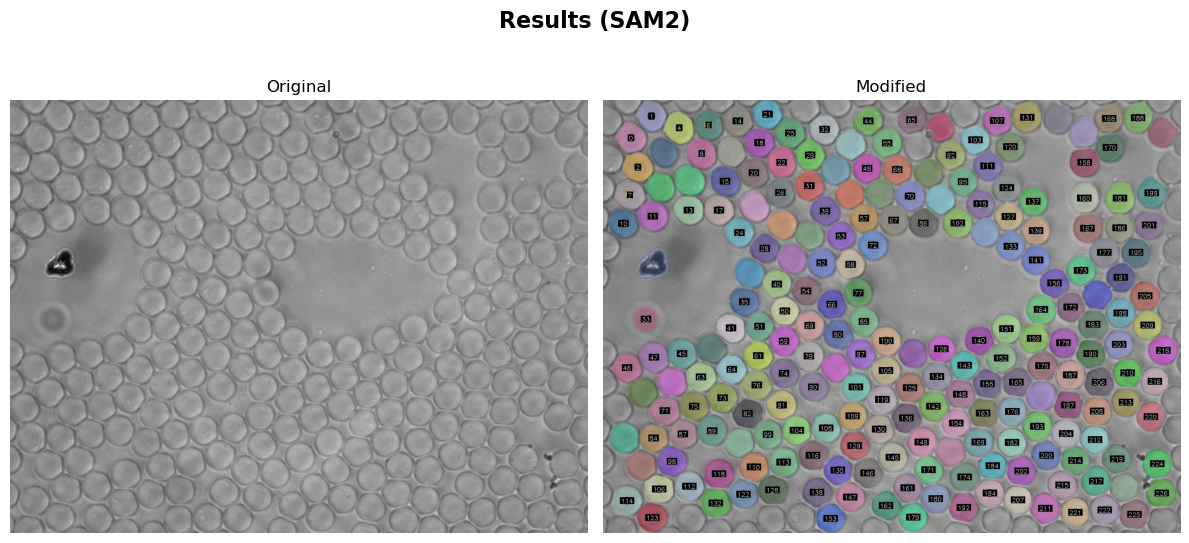

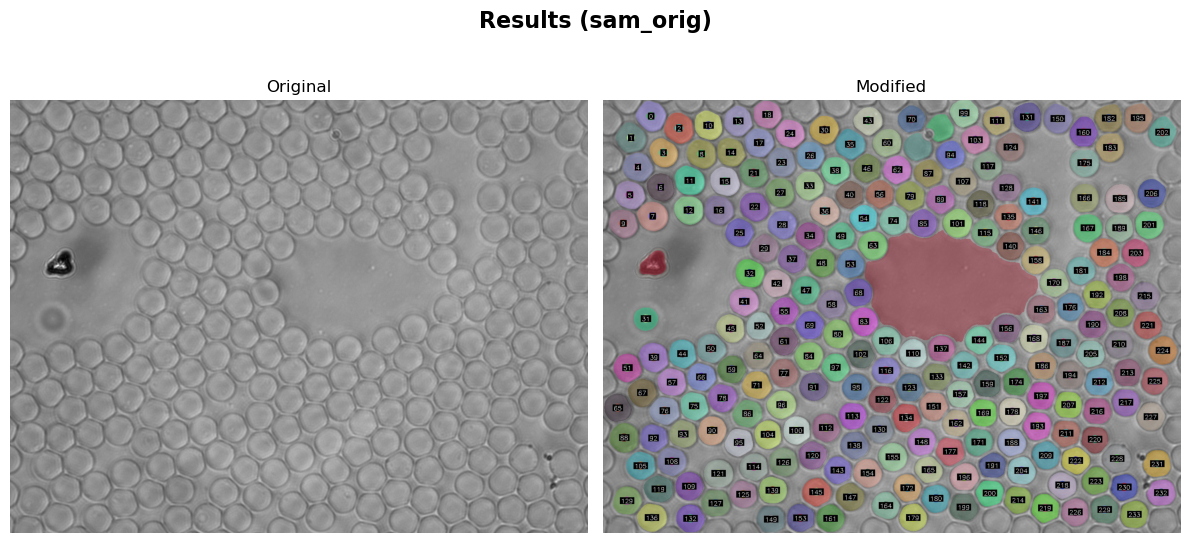

In [27]:
IMAGE_NAME = "DROPLETS2_10"
HOME = os.getcwd()
res_dirs = [object for object in os.listdir() if object.split(" ")[0] == "Results"]

for folder in res_dirs:
    folder_path = os.path.join(HOME, folder)
    image_res = os.path.join(folder_path, IMAGE_NAME)
    original_path = os.path.join(image_res, "base.jpg")
    modified_path = os.path.join(image_res,"total_mask.jpg")
    # print(original_path)
    original = cv2.imread(original_path)
    modified = cv2.imread(modified_path)
    # ax1 = plt
    # Convert from BGR to RGB (cv2 loads images in BGR)
    original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
    modified = cv2.cvtColor(modified, cv2.COLOR_BGR2RGB)
    
    # Create a figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
    # Display original image
    ax1.imshow(original)
    ax1.set_title(f'Original')
    ax1.axis('off')  # Hide axes
    
    # Display modified image
    ax2.imshow(modified)
    ax2.set_title(f'Modified')
    ax2.axis('off')  # Hide axes
    
    # Adjust layout and display the plot
    fig.suptitle(folder, fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    


In [59]:
import pandas as pd
import numpy as np
def compile_csv_files(root_folder):
    # List to store all individual DataFrames
    all_dataframes = []
    
    # Walk through all subdirectories
    for dirpath, dirnames, filenames in os.walk(root_folder):
        for filename in filenames:
            if filename == 'results.csv':
                file_path = os.path.join(dirpath, filename)
                try:
                    # Read the CSV file
                    df = pd.read_csv(file_path)
                    
                    # Add a column to identify which subfolder this data came from
                    df['Subfolder'] = os.path.relpath(dirpath, root_folder)
                    
                    # Append to our list of DataFrames
                    all_dataframes.append(df)
                    
                    print(f"Processed: {file_path}")
                except Exception as e:
                    print(f"Error processing {file_path}: {str(e)}")
    
    # Combine all DataFrames into one
    if all_dataframes:
        combined_df = pd.concat(all_dataframes, ignore_index=True)
        return combined_df
    else:
        print("No CSV files found.")
        return None

Processed: f:\Code\SAM-Microfluidic\Results (mSAM)\100_30_1\results.csv
Processed: f:\Code\SAM-Microfluidic\Results (mSAM)\100_30_2\results.csv
Processed: f:\Code\SAM-Microfluidic\Results (mSAM)\100_30_3\results.csv
Processed: f:\Code\SAM-Microfluidic\Results (mSAM)\100_30_4\results.csv
Processed: f:\Code\SAM-Microfluidic\Results (mSAM)\100_30_5\results.csv
Processed: f:\Code\SAM-Microfluidic\Results (mSAM)\30_30_1\results.csv
Processed: f:\Code\SAM-Microfluidic\Results (mSAM)\30_30_2\results.csv
Processed: f:\Code\SAM-Microfluidic\Results (mSAM)\30_30_3\results.csv
Processed: f:\Code\SAM-Microfluidic\Results (mSAM)\30_30_4\results.csv
Processed: f:\Code\SAM-Microfluidic\Results (mSAM)\30_30_5\results.csv
Processed: f:\Code\SAM-Microfluidic\Results (mSAM)\45_30_1\results.csv
Processed: f:\Code\SAM-Microfluidic\Results (mSAM)\45_30_2\results.csv
Processed: f:\Code\SAM-Microfluidic\Results (mSAM)\45_30_3\results.csv
Processed: f:\Code\SAM-Microfluidic\Results (mSAM)\45_30_4\results.csv
P

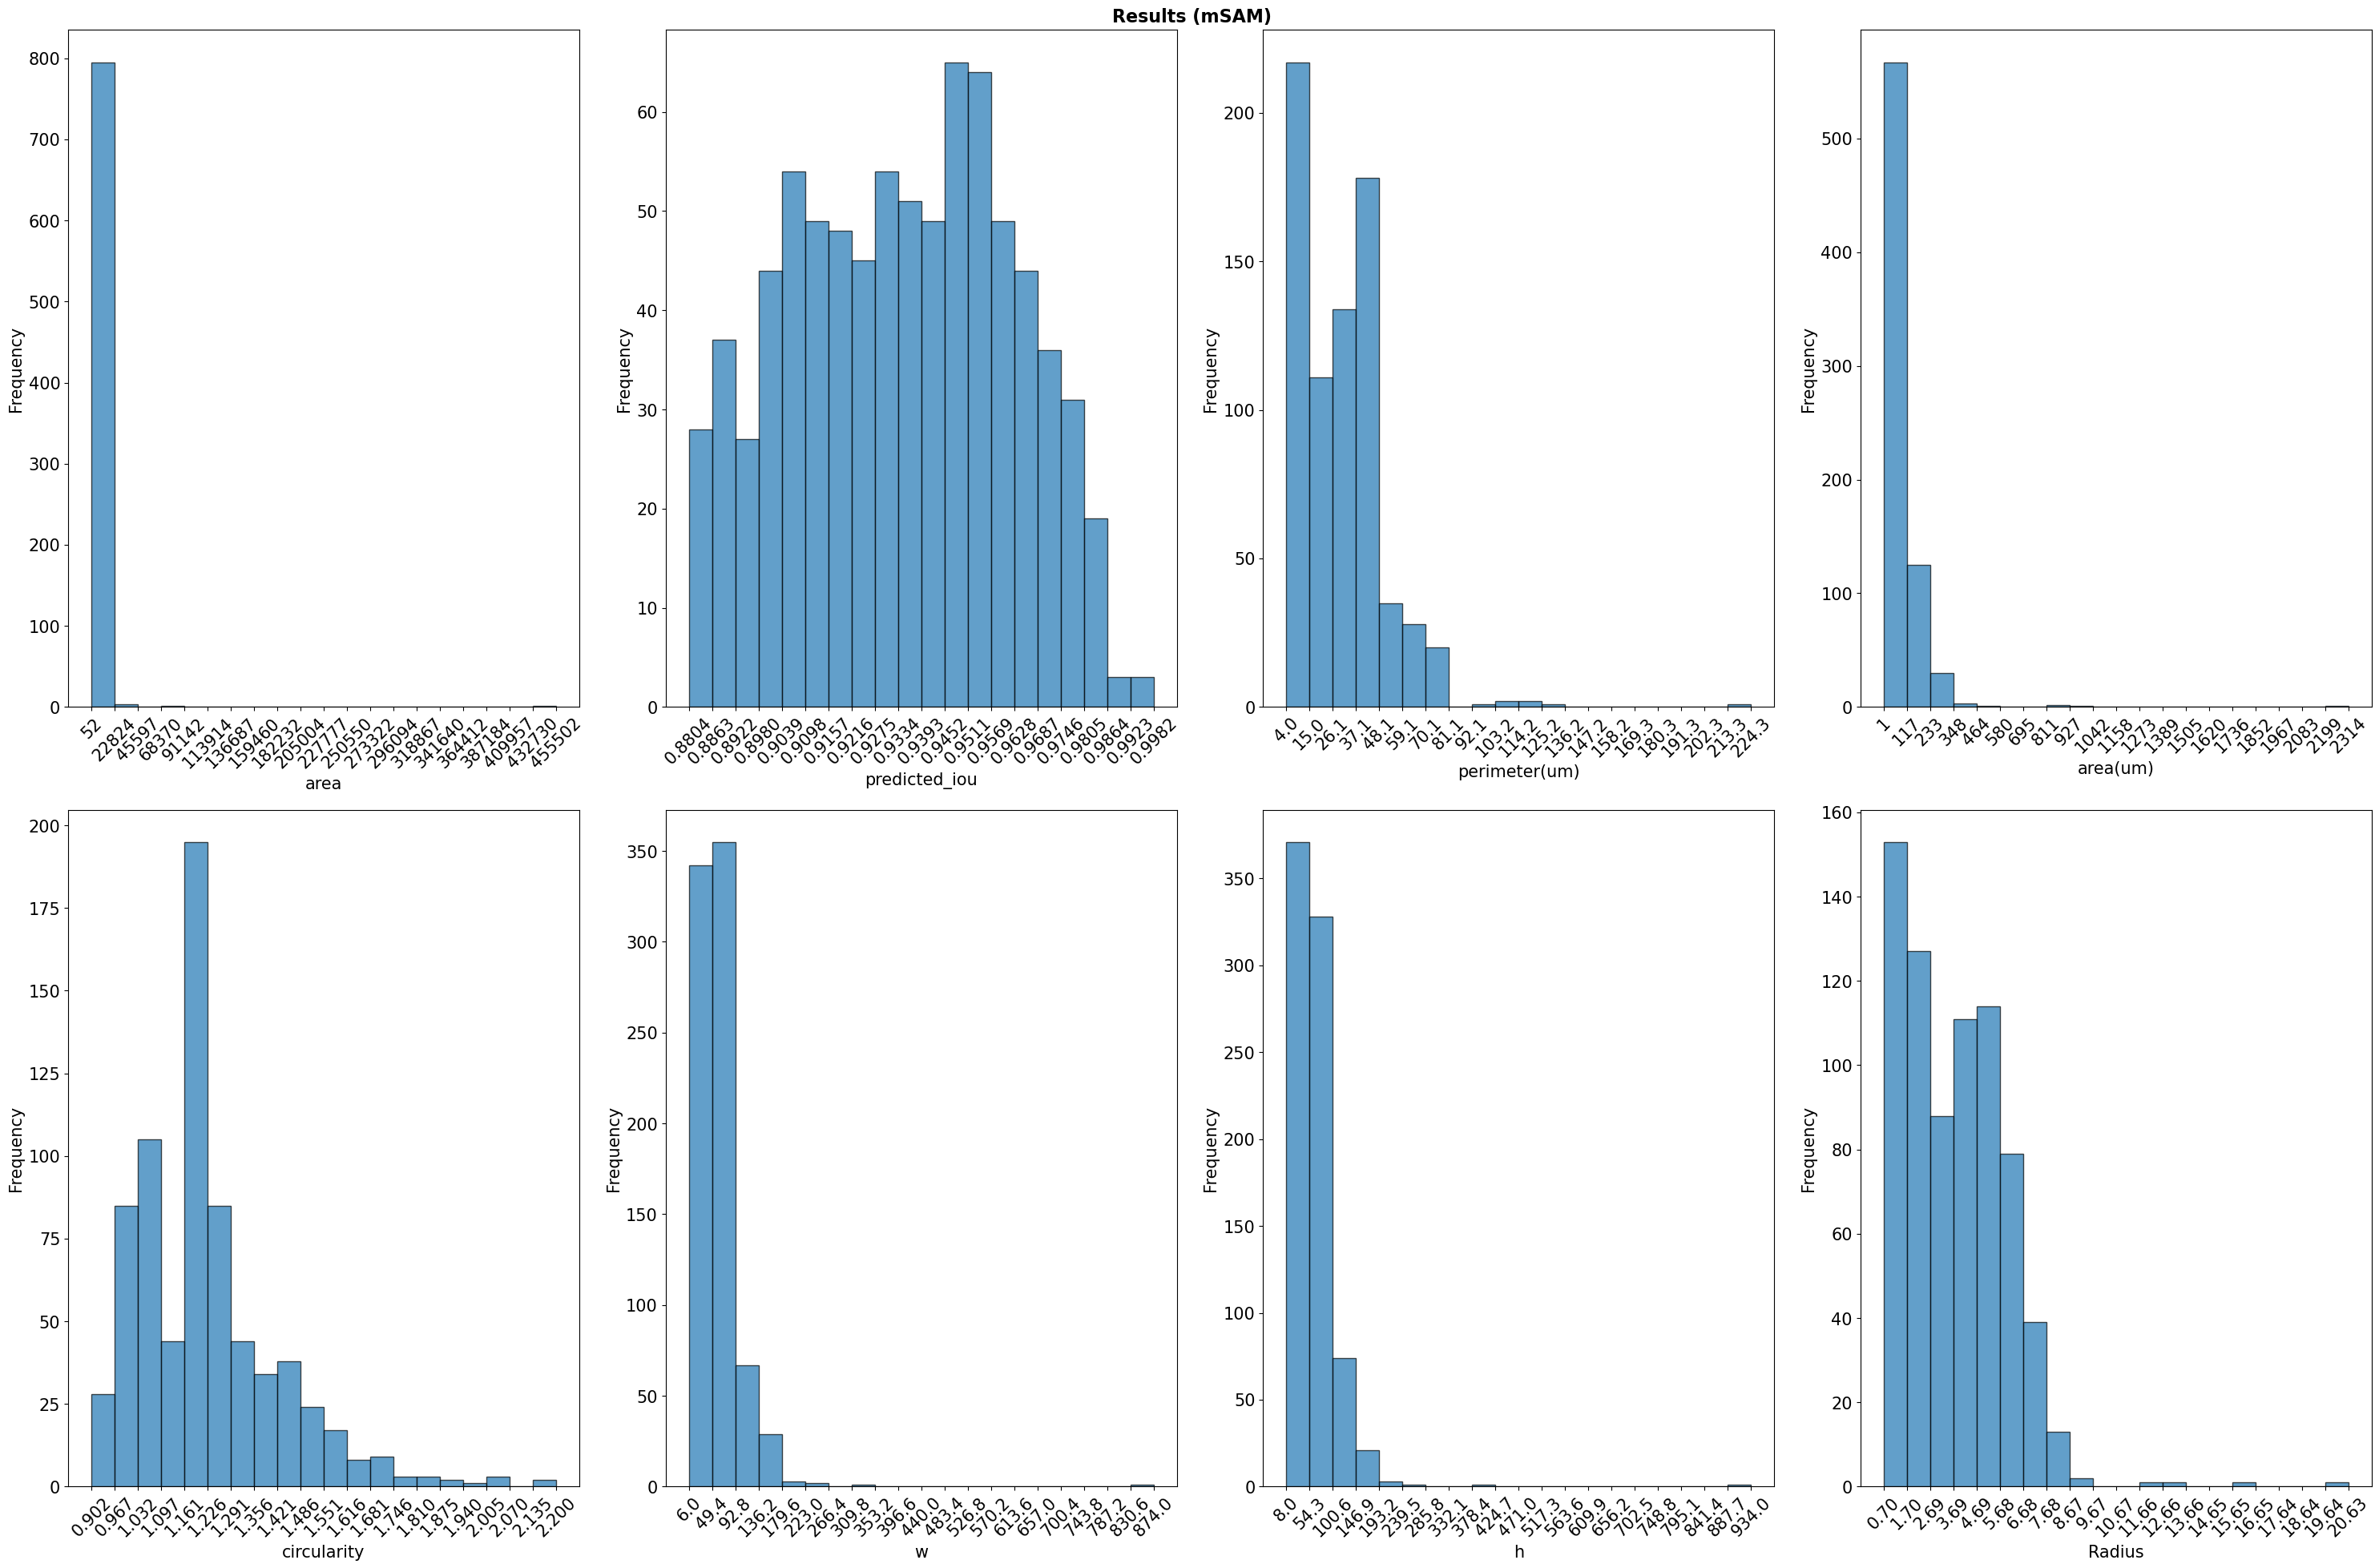

Processed: f:\Code\SAM-Microfluidic\Results (SAM2)\100_30_1\results.csv
Processed: f:\Code\SAM-Microfluidic\Results (SAM2)\100_30_2\results.csv
Processed: f:\Code\SAM-Microfluidic\Results (SAM2)\100_30_3\results.csv
Processed: f:\Code\SAM-Microfluidic\Results (SAM2)\100_30_4\results.csv
Processed: f:\Code\SAM-Microfluidic\Results (SAM2)\100_30_5\results.csv
Processed: f:\Code\SAM-Microfluidic\Results (SAM2)\30_30_1\results.csv
Processed: f:\Code\SAM-Microfluidic\Results (SAM2)\30_30_2\results.csv
Processed: f:\Code\SAM-Microfluidic\Results (SAM2)\30_30_3\results.csv
Processed: f:\Code\SAM-Microfluidic\Results (SAM2)\30_30_4\results.csv
Processed: f:\Code\SAM-Microfluidic\Results (SAM2)\30_30_5\results.csv
Processed: f:\Code\SAM-Microfluidic\Results (SAM2)\45_30_1\results.csv
Processed: f:\Code\SAM-Microfluidic\Results (SAM2)\45_30_2\results.csv
Processed: f:\Code\SAM-Microfluidic\Results (SAM2)\45_30_3\results.csv
Processed: f:\Code\SAM-Microfluidic\Results (SAM2)\45_30_4\results.csv
P

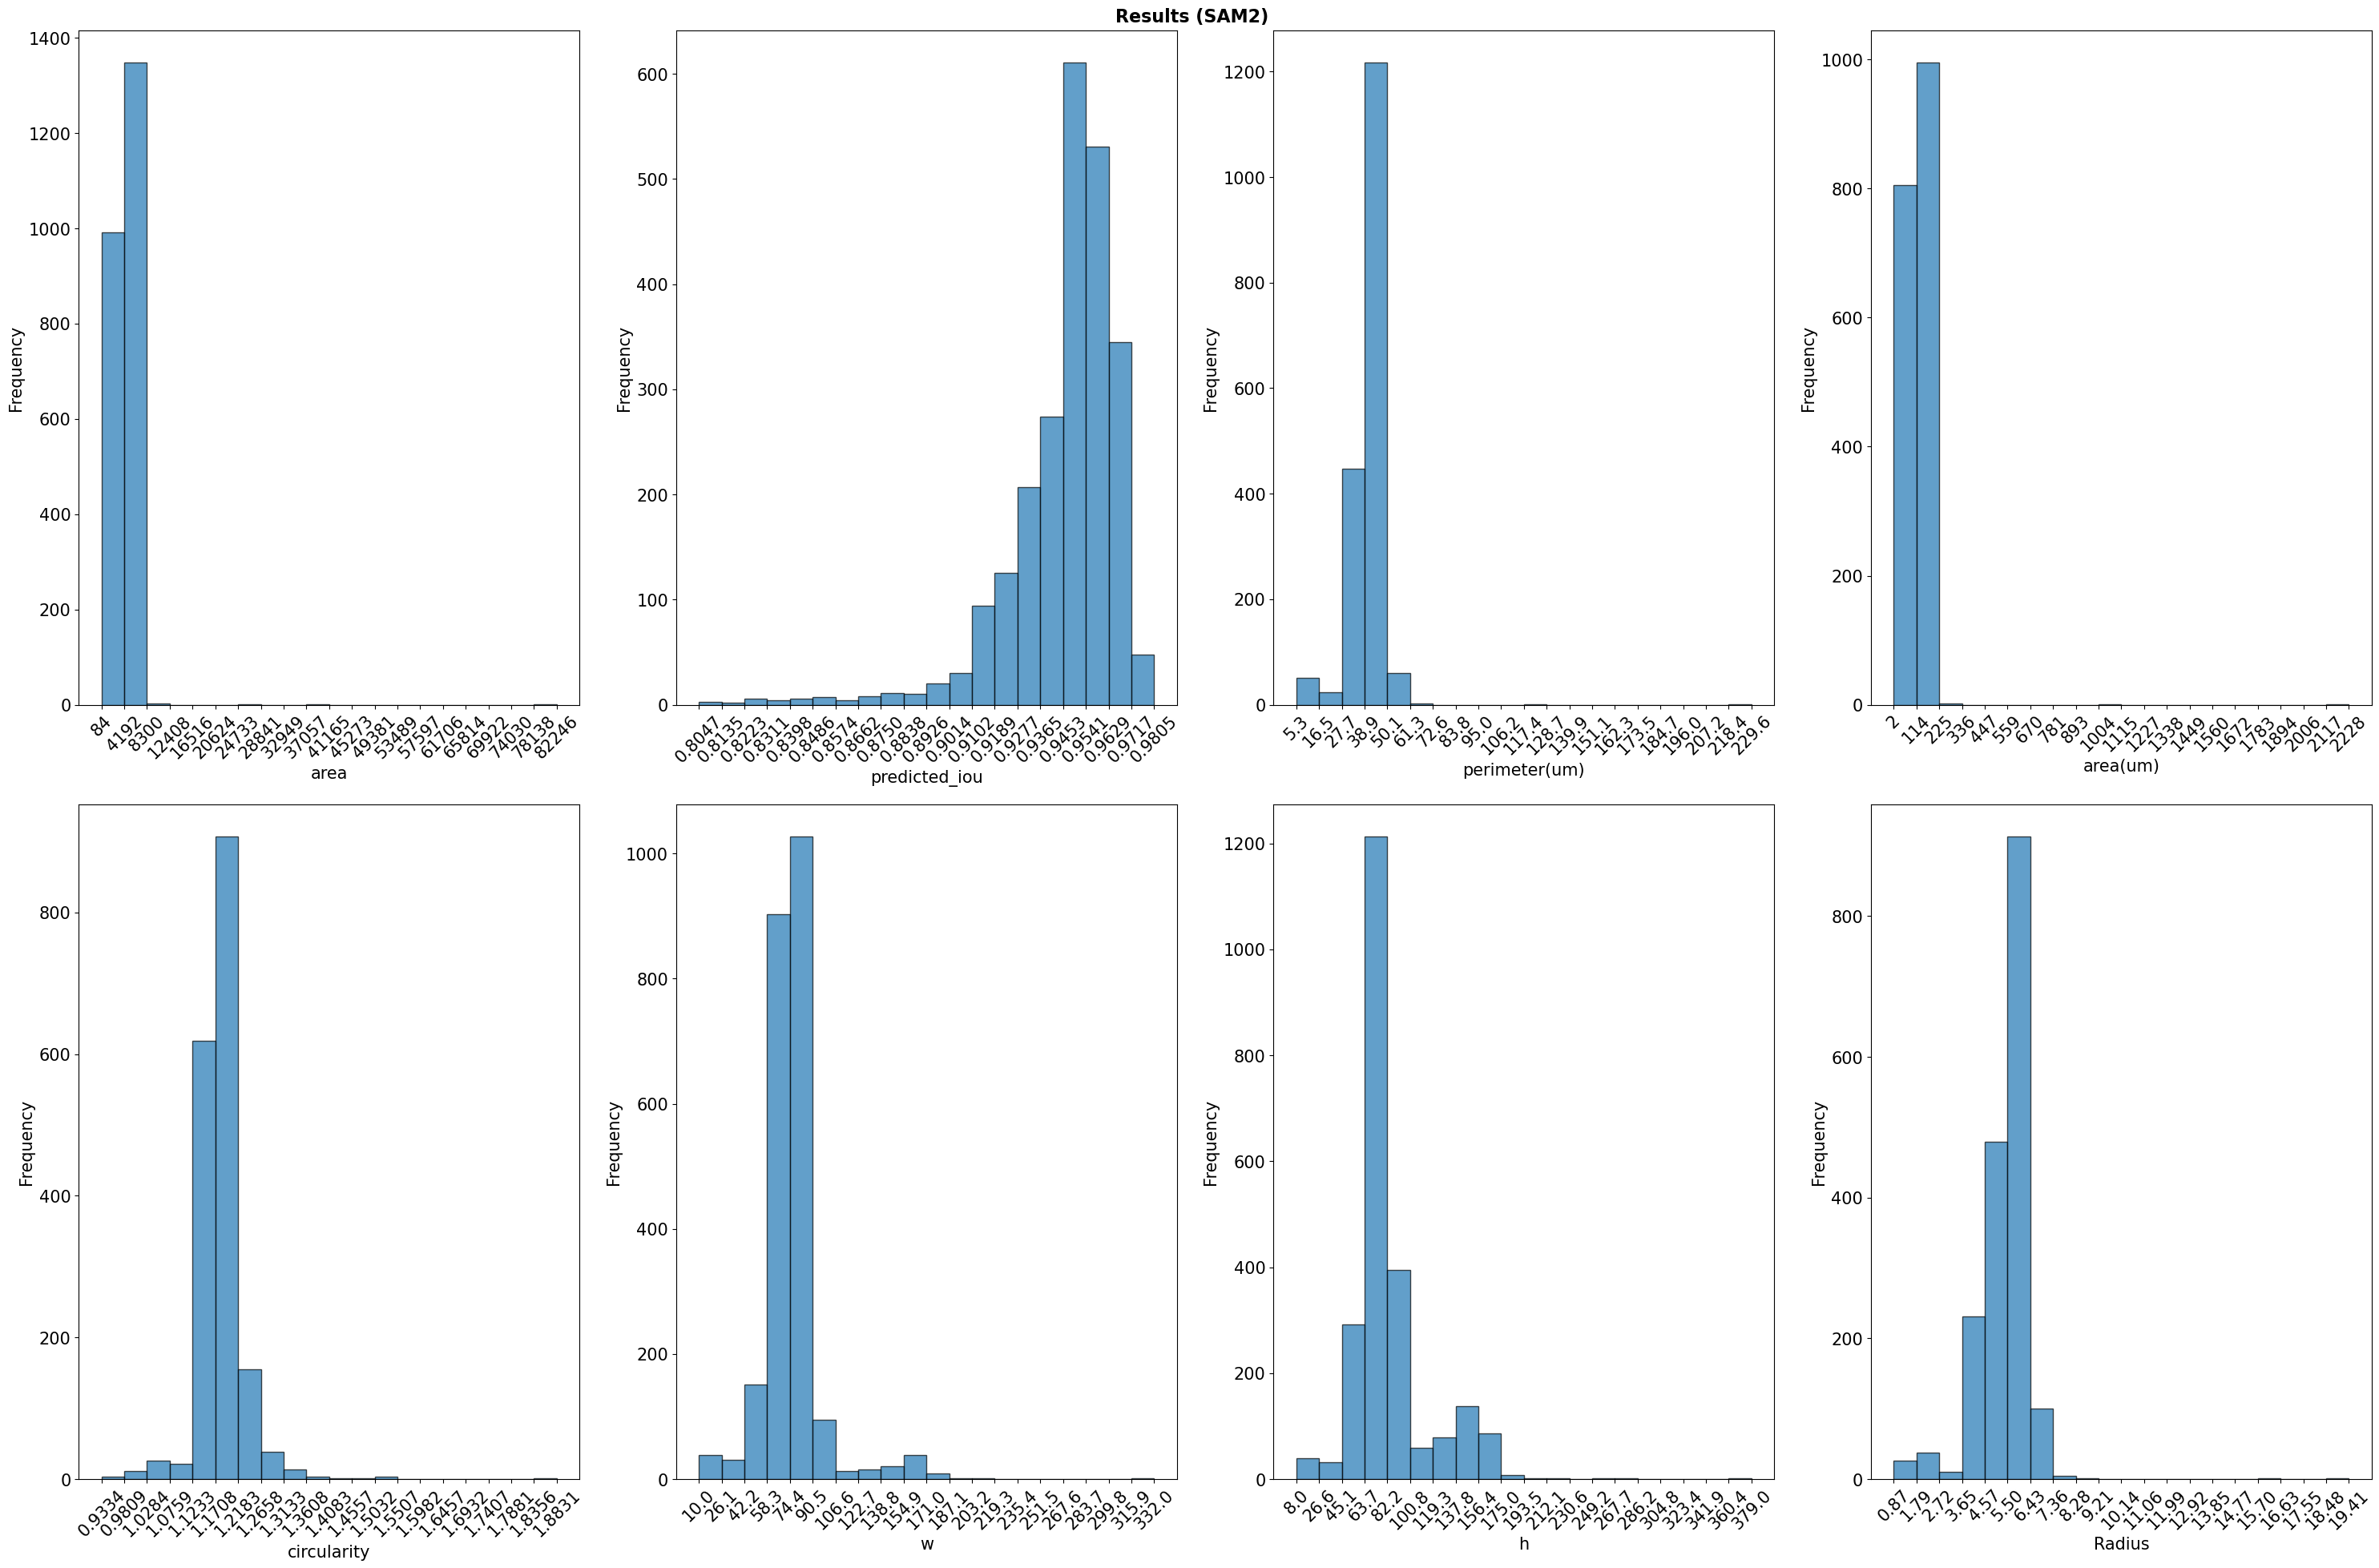

Processed: f:\Code\SAM-Microfluidic\Results (sam_orig)\100_30_1\results.csv
Processed: f:\Code\SAM-Microfluidic\Results (sam_orig)\100_30_2\results.csv
Processed: f:\Code\SAM-Microfluidic\Results (sam_orig)\100_30_3\results.csv
Processed: f:\Code\SAM-Microfluidic\Results (sam_orig)\100_30_4\results.csv
Processed: f:\Code\SAM-Microfluidic\Results (sam_orig)\100_30_5\results.csv
Processed: f:\Code\SAM-Microfluidic\Results (sam_orig)\30_30_1\results.csv
Processed: f:\Code\SAM-Microfluidic\Results (sam_orig)\30_30_2\results.csv
Processed: f:\Code\SAM-Microfluidic\Results (sam_orig)\30_30_3\results.csv
Processed: f:\Code\SAM-Microfluidic\Results (sam_orig)\30_30_4\results.csv
Processed: f:\Code\SAM-Microfluidic\Results (sam_orig)\30_30_5\results.csv
Processed: f:\Code\SAM-Microfluidic\Results (sam_orig)\45_30_1\results.csv
Processed: f:\Code\SAM-Microfluidic\Results (sam_orig)\45_30_2\results.csv
Processed: f:\Code\SAM-Microfluidic\Results (sam_orig)\45_30_3\results.csv
Processed: f:\Code\S

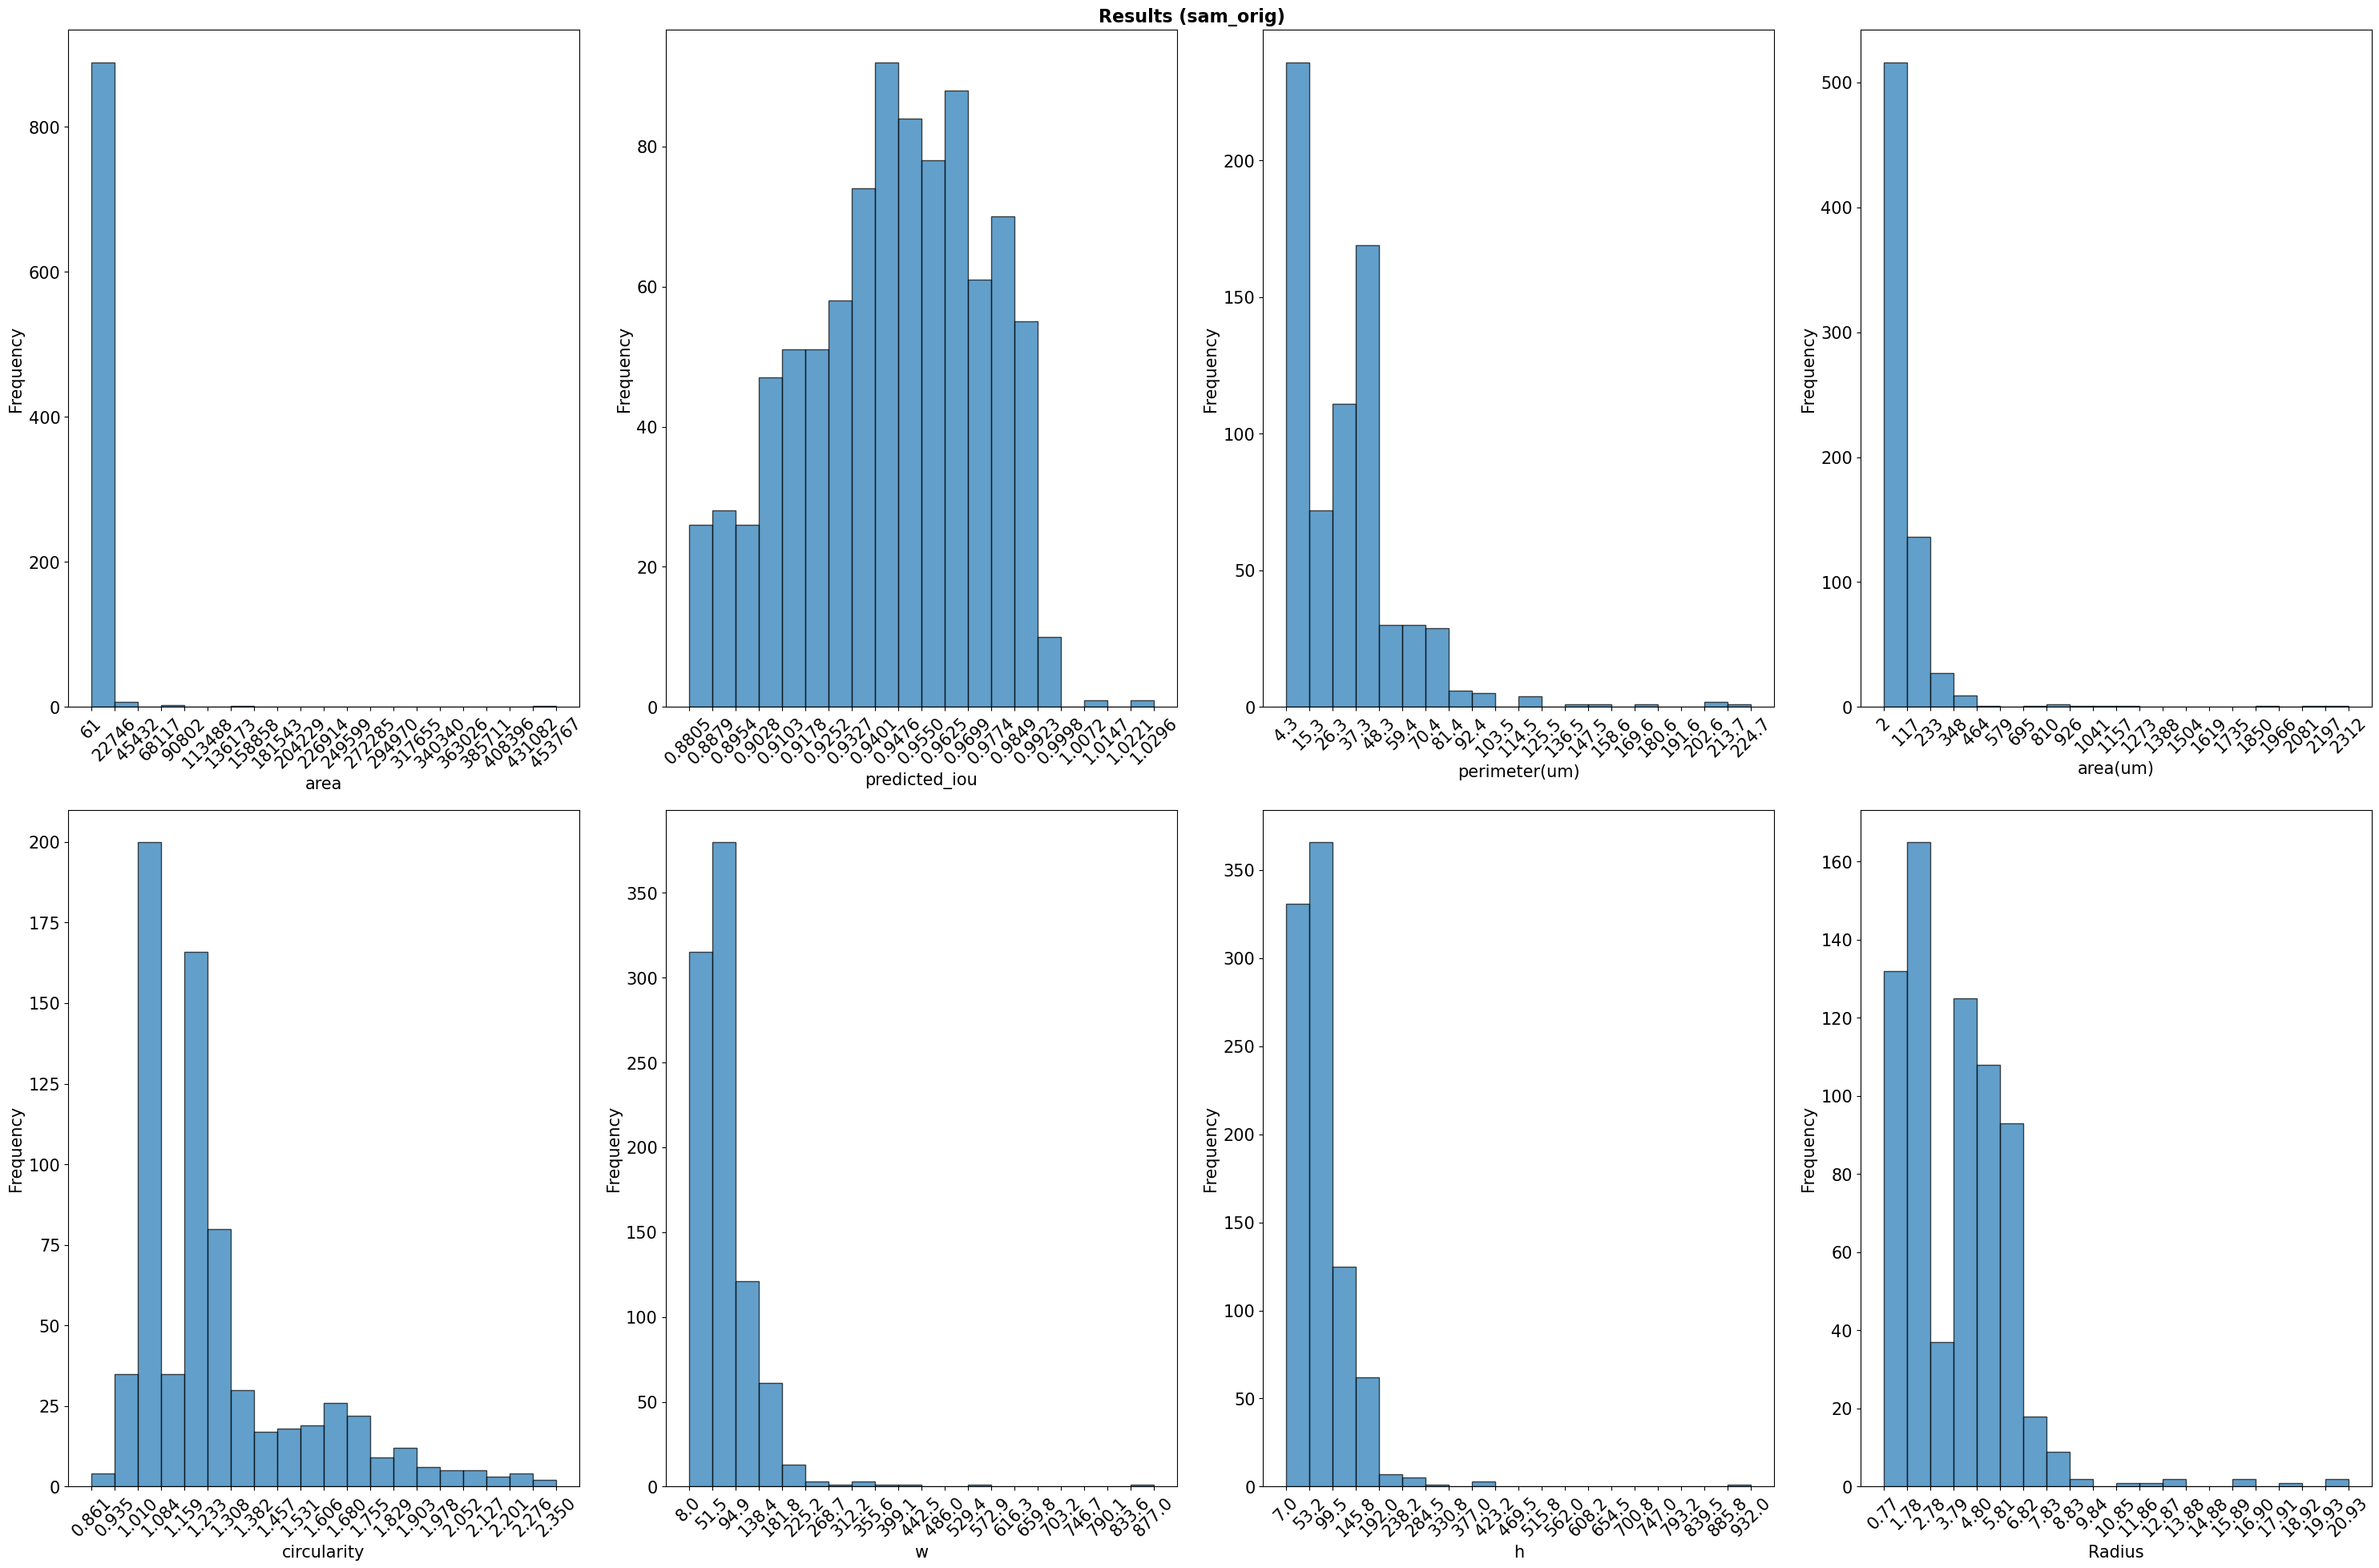

In [62]:
IMAGE_NAME = "30_30_1"
HOME = os.getcwd()
res_dirs = [object for object in os.listdir() if object.split(" ")[0] == "Results"]


for folder in res_dirs:
    folder_path = os.path.join(HOME, folder)
    image_res = os.path.join(folder_path, IMAGE_NAME)
    csv_path = os.path.join(image_res, "results.csv")
    
    
    df = compile_csv_files(folder_path)
    df = df[df['droplet'] == False]
    df['Radius'] = (df['area(um)'] / df['perimeter(um)']) * 2
    
    # print(df.head())
    
    #Add code here that will plot a histogram of every column that is numerical and ignoring blank rows
    numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
    numeric_columns = numeric_columns.drop(['index', 'scale (um/px)', 'centroid_x', 'centroid_y', 'x', 'y',])
    print(numeric_columns)
    # ['area', 'predicted_iou', 'perimeter(um)','area(um)','circularity', 'w','h']
    plt.rcParams.update({'font.size': 15
                         })
    fig, axes = plt.subplots(2, 4, figsize=(30, 20))
    axes = axes.flatten()
    fig.suptitle(folder, fontsize=16, fontweight='bold')

    # Plot histograms for each numerical column
    for i, column in enumerate(numeric_columns):
        # Drop rows where this column is blank (NaN)
        data = df[column].dropna()
        
        
        if not data.empty:
            n, bins, edges = axes[i].hist(data,bins=20,ec="black",alpha=0.7)
            # axes[i].set_title(f'Histogram of {column} in {folder}')
            axes[i].set_xlabel(column)
            axes[i].set_xticks(bins)
            axes[i].set_ylabel('Frequency')
            axes[i].tick_params(axis='x', rotation=45)
            # counts = np.bincount(data)
            # axes[i].show()
            # plt.savefig(os.path.join(folder_path, f'{column}_histogram.png'))
            # plt.close()
            # print(f"Histogram for {column} saved in {folder_path}")
        else:
            # print(f"No data to plot for {column} in {folder}")
            print("Uhh")
    plt.tight_layout()    
    plt.show()